/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


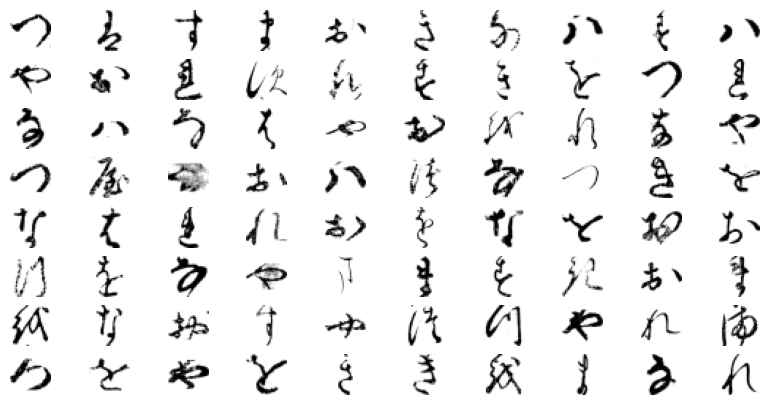

In [ ]:

from sklearn.datasets import fetch_openml
import numpy as np

# Cargar el conjunto de datos Kuzushiji-MNIST y convertir las etiquetas a números
mnist = fetch_openml('Kuzushiji-MNIST', version=1)
mnist.target = mnist.target.astype(np.int64)

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

from sklearn.cluster import KMeans
k = 80  # Número de clústeres


kmeans = KMeans(n_clusters=k, random_state=42)#aqui

X_digits_dist = kmeans.fit_transform(X_train)


idxs = np.argmin(X_digits_dist, axis=0)


X_representative_digits = X_train.values[idxs]

import matplotlib.pyplot as plt #visualiza

plt.figure(figsize=(10, 5))


for index, X_representative_digit in enumerate(X_representative_digits): # itera sobre las imagens mas representativas
    plt.subplot(8, 10, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()


In [ ]:
y_representative_digits = y_train.values[idxs]
# contiene las respuestas o las y  :V   uqe utiliza idxs  para saber a que cluster pertences

In [ ]:
#creo una regresion logistica

from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)#tiempo medido
log_reg2.score(X_test, y_test)  #rendimiento

CPU times: user 260 ms, sys: 213 ms, total: 473 ms
Wall time: 373 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6350285714285714

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:3000], y_train[:3000])
log_reg.score(X_test, y_test)

CPU times: user 4min 13s, sys: 40.9 s, total: 4min 54s
Wall time: 3min 2s


0.6574857142857143

In [ ]:
#Claro, este código realiza una propagación de etiquetas basada en los clusters encontrados por el algoritmo K-Mean
y_train_propagated = np.empty(len(X_train))
for i in range(k):#se itera sobre los cluster generados
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]  #i array boleano que indican qu muestras pertencen al cluster

  log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])

log_reg3.score(X_test, y_test)#

CPU times: user 6.24 s, sys: 1.92 s, total: 8.16 s
Wall time: 4.22 s


0.6426857142857143

In [ ]:
###El aprendizaje activo (o *Active Learning*)
#consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración
# nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas

probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])   # Ordenar las muestras por el problema
sorted_labels = labels[sorted_ixs[:10]]    # Seleccionar las 10 muestras con mayor problema
print(sorted_labels)


[0.99988194 0.9999175  0.99992388 0.9999295  0.99992977 0.99993009
 0.9999301  0.9999337  0.99993527 0.99993572]


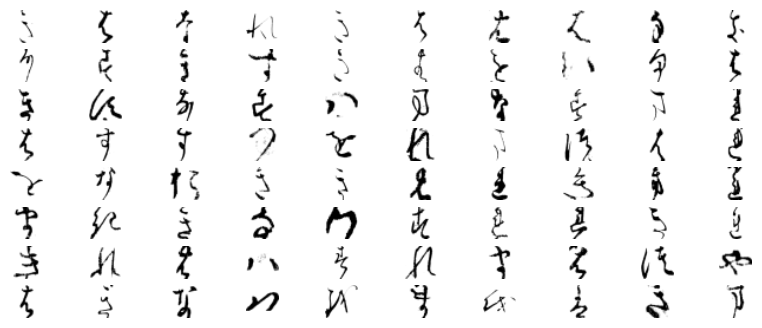

In [ ]:

X_lowest = X_train.values[:1000][sorted_ixs[:k]]#seleciona las primeras 1000 filas del enetrenamiento
plt.figure(figsize=(10, 4))#gradcio 10 de aqncho y 4 de alto
for index, img in enumerate(X_lowest):#itera sobre cada imagen
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")#muestra la imagen
    plt.axis('off')
plt.show()

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 7.02 s, sys: 2.8 s, total: 9.82 s
Wall time: 7.06 s


0.6562285714285714

2 ocpcion
